# Building Ages and Size Analysis

The analysis in this notebook is based on the PLUTO dataset, which consists of information on buildings in New York City
(https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). A disclaimer on that page lets us know that dataset may not be 100% accurate and may have missing data, although it is close. I double checked some of the Brownsville addresses for accuracy and to check if alternate addresses were used in the PLUTO dataset, doing Google searches and using a few property sites as a reference (propertyshark, addressreport, zillow, etc). 

-------------

# NYC

A short analysis of New York City buildings, looking at average age, size, number of floors and number of units. Buildings in NYC are not the central focus of this notebook, but it would be good to have an idea of this information to compare with buildings in the Brownsville area that are of interest. 

In [1]:
#loading up necesary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
pluto = pd.read_csv("pluto_21v2.csv")
pluto

C:\Users\miss_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19,20,22,24,26,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,4660,34,212.0,380.00,NaN,11.0,12.0,10467.0,E062,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.877873,-73.863604,NaN
1,MN,445,54,103.0,38.00,4000.0,1.0,2.0,10003.0,E028,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.725333,-73.988711,NaN
2,MN,467,55,103.0,40.00,2000.0,1.0,2.0,10003.0,L003,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.731190,-73.987722,NaN
3,BK,2621,7501,301.0,573.00,3003.0,14.0,33.0,11222.0,E238,...,3.026210e+09,1/23/2008,1,NaN,NaN,21v2,NaN,40.726484,-73.951001,NaN
4,MN,1970,58,109.0,213.03,1001.0,5.0,9.0,10027.0,E080,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.817053,-73.952741,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858208,SI,5016,55,503.0,132.04,NaN,31.0,51.0,10306.0,E162,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.557440,-74.137239,NaN
858209,SI,3571,63,502.0,114.02,NaN,31.0,50.0,10306.0,E159,...,NaN,NaN,3,NaN,1.0,21v2,NaN,40.581080,-74.103509,NaN
858210,BK,7690,206,315.0,642.00,NaN,22.0,45.0,11229.0,E276,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.612185,-73.944649,NaN
858211,MN,2105,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,1.0,1.0,21v2,NaN,40.828169,-73.933870,NaN


In [3]:
len(pluto)

858213

In [4]:
pluto.isna

<bound method DataFrame.isna of        borough  block   lot     cd  ct2010  cb2010  schooldist  council  \
0           BX   4660    34  212.0  380.00     NaN        11.0     12.0   
1           MN    445    54  103.0   38.00  4000.0         1.0      2.0   
2           MN    467    55  103.0   40.00  2000.0         1.0      2.0   
3           BK   2621  7501  301.0  573.00  3003.0        14.0     33.0   
4           MN   1970    58  109.0  213.03  1001.0         5.0      9.0   
...        ...    ...   ...    ...     ...     ...         ...      ...   
858208      SI   5016    55  503.0  132.04     NaN        31.0     51.0   
858209      SI   3571    63  502.0  114.02     NaN        31.0     50.0   
858210      BK   7690   206  315.0  642.00     NaN        22.0     45.0   
858211      MN   2105   450    NaN     NaN     NaN         NaN      NaN   
858212      MN   2156    44  112.0  269.00     NaN         6.0     10.0   

        zipcode firecomp  ...        appbbl    appdate  plutomapid 

In [5]:
pluto.fillna(value=0, inplace=True)

I filled the NA values (with 0), because dropping them affected the data in a way that made analyzing dificult

Looking at the building square feet ("bldgarea" column)

In [6]:
pluto["bldgarea"].mean()

6504.289891903292

In [7]:
pluto["bldgarea"].median()

2001.0

In [8]:
pluto["bldgarea"].mode()

0    0.0
dtype: float64

Looking at the year the buildings were built ("yearbuilt" column)

In [9]:
pluto["yearbuilt"].mean()

1846.0182646965263

In [10]:
pluto["yearbuilt"].median()

1930.0

In [11]:
pluto["yearbuilt"].mode()

0    1920.0
dtype: float64

This mean, median and mode of the years of buildings being built is interesting, as a search on Statista reveals that the average building age in NYC is 53 years old (as of 2014). 

Looking at numbers of floors in buildings

In [12]:
pluto["numfloors"].mean()

2.3384276164540303

In [13]:
pluto["numfloors"].median()

2.0

In [14]:
pluto["numfloors"].mode()

0    2.0
dtype: float64

Number of residental units

In [15]:
pluto["unitsres"].mean()

4.188058209325657

In [16]:
pluto["unitsres"].median()

2.0

In [17]:
pluto["unitsres"].mode()

0    1.0
dtype: float64

So our information for NYC buildings is: <br>

Average building area: 6504 sqr feet<br>

Average year buildings were built: 1846<br>

Average number of floors: 2.33 floors<br>

Average number of residential units per building: 4.1 units

Text(0.5, 0, 'Years Built')

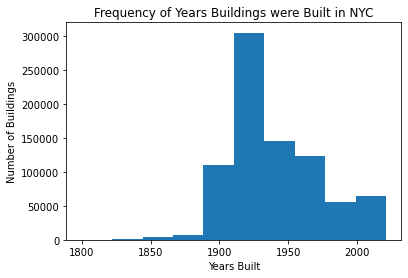

In [18]:
pluto['yearbuilt'].plot(kind='hist',range=(1800,2021), bins=10)
plt.title("Frequency of Years Buildings were Built in NYC")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

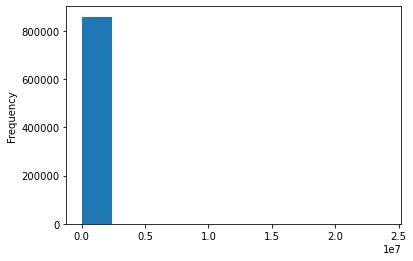

In [19]:
pluto['bldgarea'].plot(kind='hist')

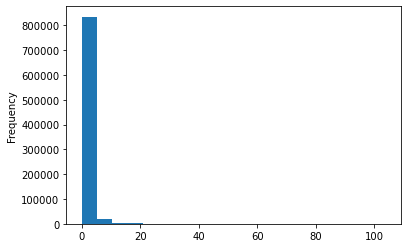

In [20]:
pluto['numfloors'].plot(kind='hist', bins = 20)

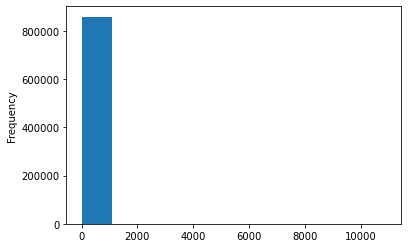

In [21]:
pluto['unitsres'].plot(kind='hist')

-----------------

-----------------

# Brownsville

In [22]:
pluto_bk16 = pd.read_csv("pluto_bk16.csv")
pluto_bk16

C:\Users\miss_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BK,1509,7501,303,379.0,1000.0,16,41,11233,E222,...,3.015090e+09,6/12/1993,1,NaN,NaN,21v2,NaN,40.682184,-73.917910,NaN
1,BK,1510,7501,316,373.0,3001.0,23,41,11233,E233,...,3.015100e+09,6/12/1993,1,NaN,NaN,21v2,t,40.682596,-73.914863,NaN
2,BK,3622,19,316,896.0,2003.0,23,42,11212,E257,...,3.036220e+09,9/20/2004,1,NaN,NaN,21v2,NaN,40.656548,-73.911000,NaN
3,BK,3621,49,316,896.0,2002.0,23,42,11212,E257,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.656466,-73.911537,NaN
4,BK,3557,8,316,898.0,1000.0,23,41,11212,L120,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.664122,-73.912947,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,BK,4717,2,317,890.0,NaN,18,42,11212,E257,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.654439,-73.913111,NaN
14579,BK,4717,17,317,890.0,5000.0,18,42,11212,E257,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.654763,-73.914034,NaN
14580,BK,3565,1,316,892.0,NaN,23,41,11212,E283,...,NaN,NaN,1,NaN,NaN,21v2,t,40.661316,-73.918585,NaN
14581,BK,3520,82,316,924.0,NaN,23,41,11212,L120,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.667114,-73.911906,NaN


In [23]:
pluto_bk16.fillna(value=0, inplace=True)

Building area

In [24]:
pluto_bk16["bldgarea"].mean()

5181.590070630185

In [25]:
pluto_bk16["bldgarea"].median()

2564.0

In [26]:
pluto_bk16["bldgarea"].mode()

0    0.0
dtype: float64

Year built

In [27]:
pluto_bk16["yearbuilt"].mean()

1809.399711993417

In [28]:
pluto_bk16["yearbuilt"].median()

1925.0

In [29]:
pluto_bk16["yearbuilt"].mode()

0    1930.0
dtype: float64

Number of floors

In [30]:
pluto_bk16["numfloors"].mean()

2.278555166975245

In [31]:
pluto_bk16["numfloors"].median()

2.0

In [32]:
pluto_bk16["numfloors"].mode()

0    2.0
dtype: float64

Number of residential units

In [33]:
pluto_bk16["unitsres"].mean()

4.374957141877529

In [34]:
pluto_bk16["unitsres"].median()

2.0

In [35]:
pluto_bk16["unitsres"].mode()

0    2.0
dtype: float64

Text(0.5, 0, 'Years Built')

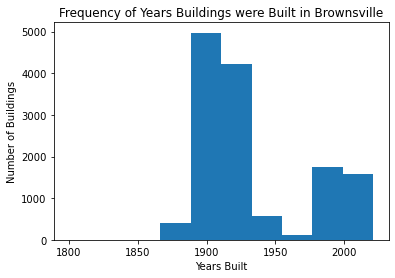

In [36]:
pluto_bk16['yearbuilt'].plot(kind='hist',range=(1800,2021), bins=10)
plt.title("Frequency of Years Buildings were Built in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

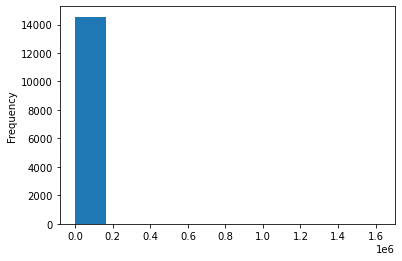

In [37]:
pluto_bk16['bldgarea'].plot(kind='hist')

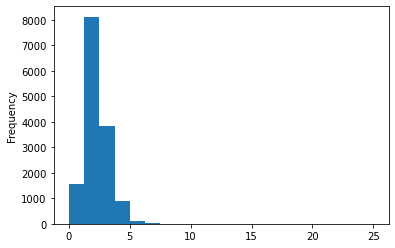

In [38]:
pluto_bk16['numfloors'].plot(kind='hist', bins = 20)

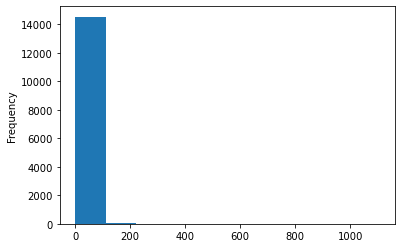

In [39]:
pluto_bk16['unitsres'].plot(kind='hist')

So our information for Brownsville buildings is: <br>

Average building area: 5181 sqr feet<br>

Average year buildings were built: 1809<br>

Average number of floors: 2.27 floors<br>

Average number of residential units per building:  4 units

------------------------

----------------

# Brownsville Complaints Buildings

In this section, I will look at the ages and sizes of buildings in Brownsville. These buildings are the ones with the most complaints, violations and "No Access" status descriptions, as seen in my other analysis (Brownsville.csv analysis and visualizations). There are 26 total addresses that are in this version of the data.<br>
<br>
While searching for these addresses in the dataset, I ran into some issues. First is that a few of these (1711 Fulton Avenue and 210 Lott Avenue) are on the PLUTO data set, but under diffrent addresses due to them being part of complexes. There are two more addresses (351 Legion Street and 37 Lots New Avenue) that don't appear in the dataset at all.<br>
<br>
Alternate Addresses:<br>
1711 Fulton Avenue - 88 Chauncey Street<br>
210 Lott Avenue - 187 Hegeman Avenue


In [41]:
pluto_topbk16 = pd.read_csv("pluto_brownsvilleanalysis.csv")
pluto_topbk16

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude
0,BK,1691,12,303,297.00,2003,16,36,11233,L111,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.679861,-73.929717
1,BK,3621,1,316,896.00,2002,23,42,11212,E257,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.656021,-73.911614
2,BK,1568,12,316,369.00,2002,23,37,11233,L176,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.677032,-73.910562
3,BK,4632,6,317,892.00,3001,18,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.662364,-73.922015
4,BK,4632,25,317,892.00,3001,18,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.661493,-73.921043
5,BK,1439,4,316,303.00,3001,16,41,11233,L176,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.675509,-73.919058
6,BK,4615,6,317,892.00,2001,17,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.664004,-73.923833
7,BK,4632,11,317,892.00,3001,18,41,11212,E283,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.662108,-73.921730
8,BK,3628,1,316,920.00,2002,23,42,11212,E257,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.657616,-73.904645
9,BK,4648,59,317,886.00,1002,18,41,11212,L174,...,NaN,NaN,NaN,1,NaN,NaN,21v2,NaN,40.658115,-73.921739


In [42]:
pluto_topbk16.fillna(value=0, inplace=True)

Building Area

In [43]:
pluto_topbk16["bldgarea"].mean()

55437.416666666664

In [44]:
pluto_topbk16["bldgarea"].median()

31284.0

In [46]:
pluto_topbk16["bldgarea"].mode()

0       1840
1       2880
2       3000
3       3075
4       3272
5       3280
6       4850
7       5520
8       9240
9      17800
10     20000
11     28568
12     34000
13     34235
14     35600
15     61600
16     61608
17     61620
18     68172
19     92800
20     96180
21    158620
22    245538
23    277200
dtype: int64

Year built

In [58]:
pluto_topbk16["yearbuilt"].mean()

1929.0416666666667

In [59]:
pluto_topbk16["yearbuilt"].median()

1929.0

In [60]:
pluto_topbk16["yearbuilt"].mode()

0    1930
dtype: int64

Number of floors

In [61]:
pluto_topbk16["numfloors"].mean()

4.916666666666667

In [62]:
pluto_topbk16["numfloors"].median()

4.0

In [63]:
pluto_topbk16["numfloors"].mode()

0    4
1    6
dtype: int64

Number of Residential Units

In [64]:
pluto_topbk16["unitsres"].mean()

67.08333333333333

In [65]:
pluto_topbk16["unitsres"].median()

36.5

In [66]:
pluto_topbk16["unitsres"].mode()

0     2
1     4
2     6
3    71
dtype: int64

Information for the top buildings in Brownsville with complaints/violations is: <br>

Average building area:  55,437 sqr feet<br>

Average year buildings were built: 1929<br>

Average number of floors:  4.9 floors<br>

Average number of residential units per building:  67 units

Text(0.5, 0, 'Years Built')

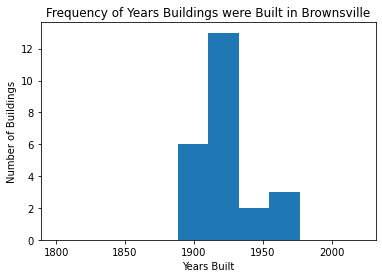

In [67]:
pluto_topbk16['yearbuilt'].plot(kind='hist',range=(1800,2021))
plt.title("Frequency of Years Buildings were Built in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

Text(0.5, 0, 'Building Square Feet')

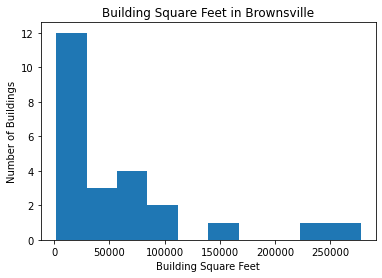

In [68]:
pluto_topbk16['bldgarea'].plot(kind='hist')
plt.title("Building Square Feet in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Building Square Feet")

Text(0.5, 0, 'Number of Floors in Building')

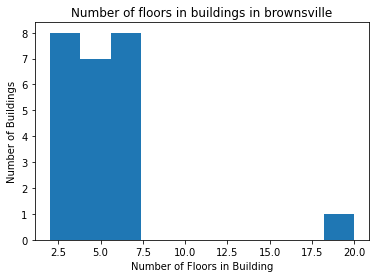

In [69]:
pluto_topbk16['numfloors'].plot(kind='hist')
plt.title("Number of floors in buildings in brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Floors in Building")

Text(0.5, 0, 'Number of Residential Units')

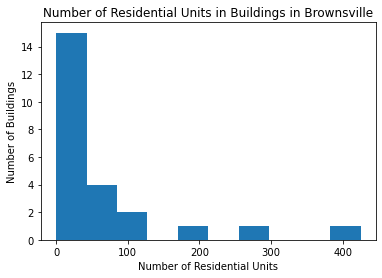

In [70]:
pluto_topbk16['unitsres'].plot(kind='hist')
plt.title("Number of Residential Units in Buildings in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Residential Units")

So far, my findings are:<br>
-The building with the latest year built is 88 Chauncey Street (aka 1711 Fulton Avenue), which was built in 1974. This address happens to be the one that is most commonly in the top spot in complaints/violations/no access within the three time frames explored. <br>
-The oldest building is 437 Macon Street, which was built in 1891. This building is also one of the smallest in the data, comprised of only 1 building, 3 floors and 2 residential units.<br>
-